In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io
dat = scipy.io.loadmat('05HW1_diabetes.mat') 

In [2]:
x_train=dat["x_train"]
y_train=dat["y_train"]
x_test=dat["x_test"]
y_test=dat["y_test"]

In [3]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [4]:
class shrinkage_regressor:
    def __init__(self,tp,lam,x_train,y_train):
        self.tp=tp
        self.lam=lam
        self.x_train=x_train
        self.y_train=y_train
        
        if self.tp=="lasso":
            self.reg=Lasso(alpha=self.lam).fit(self.x_train,self.y_train)
        else:
            self.reg=Ridge(alpha=self.lam).fit(self.x_train,self.y_train)
            
    def beta(self):
        return(self.reg.coef_)

    def error_RMSE(self,x_test,y_test):
        pred=self.reg.predict(x_test)
        error=np.sqrt(np.sum((pred-y_test)**2)/len(pred))
        return(error)

In [5]:
lam_set=[0.01,0.1,1,10, 100, 1000]
beta_set=[]
error_set=[]
for i in range(len(lam_set)):
    my_lasso=shrinkage_regressor(tp="lasso",lam=lam_set[i],x_train=x_train,y_train=y_train)
    beta_set.append(my_lasso.beta().tolist())
    error_set.append(my_lasso.error_RMSE(x_test=x_test,y_test=y_test))

In [6]:
beta_set=np.array(beta_set)
beta_set.shape

(6, 64)

## (1)¶

Text(0, 0.5, 'beta')

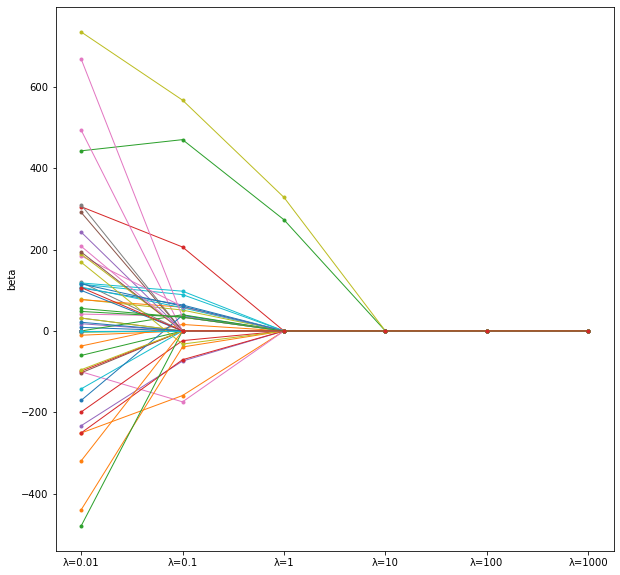

In [7]:
plt.figure(figsize=(10,10))
x_axis=[0,1,2,3,4,5]
for i in range((np.shape(beta_set)[1])):
    plt.plot(x_axis,beta_set[:,i],linestyle='-', marker=".",linewidth=1.0)
plt.xticks(x_axis,["λ=0.01","λ=0.1","λ=1","λ=10", "λ=100", "λ=1000"])
plt.ylabel("beta")

隨著lambda上升，越來越多feature參數被shrinkage到0

## (2)¶

Text(0, 0.5, 'root mean square error (RMSE)')

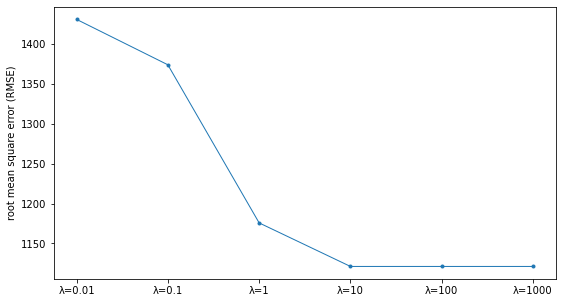

In [8]:
plt.figure(figsize=(9,5))
x_axis=[0,1,2,3,4,5]
plt.plot(x_axis,error_set,linestyle='-', marker=".",linewidth=1.0)
plt.xticks(x_axis,["λ=0.01","λ=0.1","λ=1","λ=10", "λ=100", "λ=1000"])
plt.ylabel("root mean square error (RMSE)")

隨著lambda上升，error下降，但是下降幅度持續減少。

## (3)¶

In [9]:
lam_set=[0.01,0.1,1,10, 100, 1000]
beta_set=[]
error_set=[]
for i in range(len(lam_set)):
    my_lasso=shrinkage_regressor(tp="ridge",lam=lam_set[i],x_train=x_train,y_train=y_train)
    beta_set.append(my_lasso.beta().tolist())
    error_set.append(my_lasso.error_RMSE(x_test=x_test,y_test=y_test))

In [10]:
beta_set=np.array(beta_set)
beta_set.shape

(6, 1, 64)

Text(0, 0.5, 'beta')

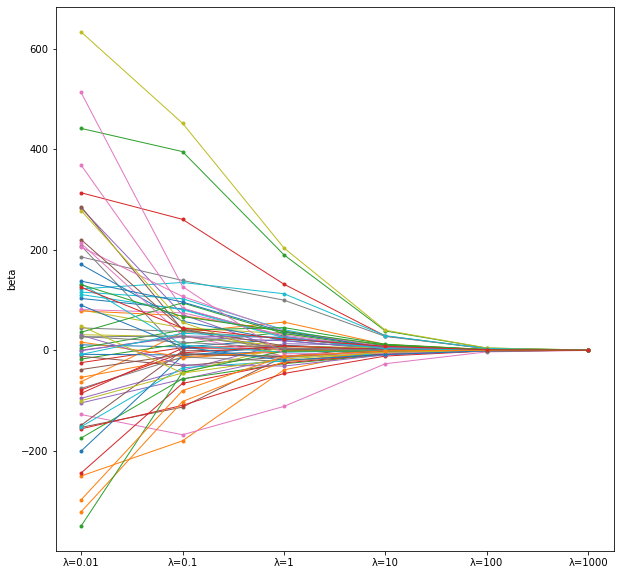

In [11]:
plt.figure(figsize=(10,10))
x_axis=[0,1,2,3,4,5]
for i in range((np.shape(beta_set)[1])):
    plt.plot(x_axis,beta_set[:,i],linestyle='-', marker=".",linewidth=1.0)
plt.xticks(x_axis,["λ=0.01","λ=0.1","λ=1","λ=10", "λ=100", "λ=1000"])
plt.ylabel("beta")

Text(0, 0.5, 'root mean square error (RMSE)')

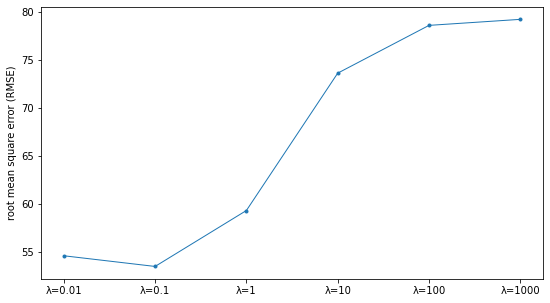

In [12]:
plt.figure(figsize=(9,5))
x_axis=[0,1,2,3,4,5]
plt.plot(x_axis,error_set,linestyle='-', marker=".",linewidth=1.0)
plt.xticks(x_axis,["λ=0.01","λ=0.1","λ=1","λ=10", "λ=100", "λ=1000"])
plt.ylabel("root mean square error (RMSE)")

隨著lambda上升，lasso參數收斂較快，且lasso會很快把參數收斂至0

## 2.

In [13]:
import matplotlib.patches as mpatches

In [14]:
wine_train=pd.read_table("05HW2_wine_training.txt",sep="  ",header=None)
wine_test=pd.read_table("05HW2_wine_test.txt",sep="  ",header=None)

C:\Users\byron_hsing\anaconda3\lib\site-packages\pandas\io\parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


In [15]:
wine_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,8.3,0.6,0,2.1,0.084,11,50,0.9972,3.40,0.61,10.2,6
1,7.8,0.5,0,1.9,0.075,8,22,0.9959,3.31,0.56,10.4,6
2,8.1,0.5,0,1.9,0.080,13,35,0.9972,3.30,0.59,9.0,6
3,8.1,0.6,0,2.1,0.077,12,65,0.9967,3.29,0.51,9.2,5
4,7.2,0.5,0,2.2,0.070,5,36,0.9960,3.33,0.48,9.4,5


In [16]:
wine_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,9.5,0.9,0,2.3,0.084,31,145,0.9978,3.24,0.53,9.4,5
1,7.7,0.9,0,2.2,0.143,7,23,0.9964,3.35,0.65,10.2,7
2,8.9,0.3,0,1.9,0.067,25,57,0.9970,3.18,1.36,10.3,6
3,9.9,0.5,0,2.3,0.071,16,40,0.9991,3.39,0.62,9.4,5
4,9.5,0.6,0,2.3,0.071,21,68,0.9992,3.46,0.63,9.5,5


In [17]:
x_train=wine_train.iloc[:,0:11]
y_train=wine_train.iloc[:,11]
x_test=wine_test.iloc[:,0:11]
y_test=wine_test.iloc[:,11]

In [18]:
class shrinkage_regressor:
    def __init__(self,tp,lam,x_train,y_train):
        self.tp=tp
        self.lam=lam
        self.x_train=x_train
        self.y_train=y_train
        
        if self.tp=="lasso":
            self.reg=Lasso(alpha=self.lam).fit(self.x_train,self.y_train)
        else:
            self.reg=Ridge(alpha=self.lam).fit(self.x_train,self.y_train)
            
    def beta(self):
        return(self.reg.coef_)

    def error_RMSE(self,error_type,x_test,y_test):
        if error_type=="test":
            pred=self.reg.predict(x_test)
            error=np.sqrt(np.sum((pred-y_test)**2)/len(pred))
            return(error)
        else:
            pred=self.reg.predict(self.x_train)
            error=np.sqrt(np.sum((pred-self.y_train)**2)/len(pred))
            return(error)

In [19]:
lam_set=[0.0001, 0.0005, 0.0025, 0.0125, 0.0625, 0.3125, 1.5625, 7.815, 39.0625, 195.3125]
train_error_set=[]
test_error_set=[]
for i in range(len(lam_set)):
    my_lasso=shrinkage_regressor(tp="lasso",lam=lam_set[i],x_train=x_train,y_train=y_train)
    train_error_set.append(my_lasso.error_RMSE(error_type="train",x_test=x_test,y_test=y_test))

for i in range(len(lam_set)):
    my_lasso=shrinkage_regressor(tp="lasso",lam=lam_set[i],x_train=x_train,y_train=y_train)
    test_error_set.append(my_lasso.error_RMSE(error_type="test",x_test=x_test,y_test=y_test))

## (1)¶


Text(0, 0.5, 'root mean square error(RMSE)')

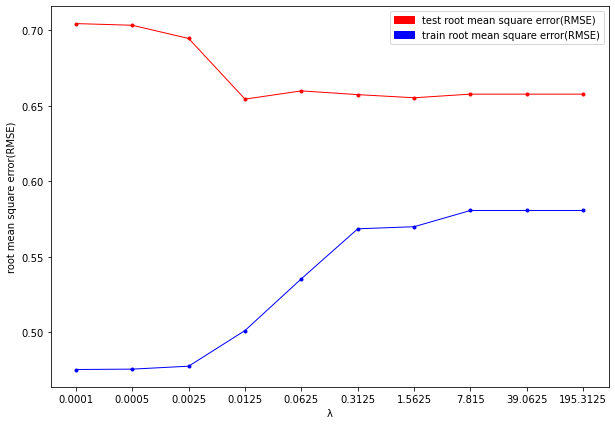

In [20]:
plt.figure(figsize=(10,7))
x_axis=np.arange(0,len(lam_set),1)
plt.plot(x_axis,train_error_set,linestyle='-', marker=".",linewidth=1.0,color="blue")
plt.plot(x_axis,test_error_set,linestyle='-', marker=".",linewidth=1.0,color="red")
plt.xticks(x_axis,[0.0001, 0.0005, 0.0025, 0.0125, 0.0625, 0.3125, 1.5625, 7.815, 39.0625, 195.3125])
red_patch = mpatches.Patch(color='red', label='test root mean square error(RMSE)')
blue_patch = mpatches.Patch(color='blue', label='train root mean square error(RMSE)')
plt.legend(handles=[red_patch,blue_patch])
plt.xlabel("λ")
plt.ylabel("root mean square error(RMSE)")

## (2)


一開始λ很小，模型複雜，所以出現train error低但是test error高現象。但隨著λ上升，越來越多features被篩選掉，模型變的較簡單，造成train error
上升，但是test error下降。

## (3)

如果當目的為預測時，當λ=0.0125時，test error最小，故選擇之。